!pip install sqlalchemy

In [1]:
import sqlalchemy as db
from sqlalchemy import create_engine

In [2]:
%pwd

'C:\\Users\\peter\\Documents\\Projekte\\Coding\\Jupyter\\RosBe'

In [3]:
%ls

 Datenträger in Laufwerk C: ist Windows
 Volumeseriennummer: AC94-BAC4

 Verzeichnis von C:\Users\peter\Documents\Projekte\Coding\Jupyter\RosBe

01.02.2023  10:52    <DIR>          .
28.01.2023  13:39    <DIR>          ..
01.02.2023  10:56    <DIR>          .ipynb_checkpoints
01.02.2023  10:02            45’173 DeleteDoubles_all.ipynb
11.12.2022  14:55         1’905’925 PandasProfiling.ipynb
28.01.2023  14:04                85 README.md
15.04.2022  08:27            49’823 SQLalchemy.ipynb
01.09.2022  09:43            83’142 SQLalchemy_abfrage1.ipynb
01.02.2023  09:38            24’179 SQLalchemy_PrepDb.ipynb
01.08.2022  15:26            24’092 SQLalchemy_time.ipynb
05.09.2022  09:36            42’861 SQLalchemy1.ipynb
19.03.2022  09:34             2’284 Sys_path.ipynb
22.06.2022  10:48            14’545 TC_DeleteDoubles.ipynb
28.01.2023  09:22         1’346’551 TC_graphics.ipynb
25.08.2022  13:29           105’630 TC_Qualität.ipynb
11.04.2022  07:51             1’797 TC_Qualität.py
11.

engine = db.create_engine('sqlite:///tc_sg.db')

In [4]:
engine = db.create_engine('sqlite:///C:\\Users\\peter\\Documents\\Projekte\\Zähler\\tc_sg.db')

### Bemerkung: Man kann den Pfad mit "\\" oder dem Einsatz von "r" angeben! Ganz oben habe ich eine Kopie von 'tc_sg' ins lokale Verzeichnis geschoben.

In [5]:
engine = db.create_engine(r'sqlite:///C:\Users\peter\Documents\Projekte\Zähler\tc_sg.db')

In [6]:
connection = engine.connect()
metadata = db.MetaData()

In [7]:
tr = db.Table('tcdata_CH_0084_01', metadata, autoload=True, autoload_with=engine)

In [8]:
print(tr.columns.keys())

['time', 'vfr11', 's12', 'vfr21', 's22', 'vfr1', 's2']


In [9]:
query = db.select([tr])

In [10]:
result_proxy = connection.execute(query)

In [11]:
result_set = result_proxy.fetchmany(50)

In [12]:
print(result_set)

[('2021-06-19 05:53:00+02:00', 360.0, 81.8000031, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 05:54:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 05:55:00+02:00', 360.0, 76.8000031, 60.0, 82.0, 0.0, 0.0), ('2021-06-19 05:56:00+02:00', 480.0, 79.9000015, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 05:57:00+02:00', 660.0, 79.5999985, 60.0, 79.0, 0.0, 0.0), ('2021-06-19 05:58:00+02:00', 420.0, 81.0, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 05:59:00+02:00', 720.0, 83.4000015, 120.0, 76.0, 0.0, 0.0), ('2021-06-19 06:00:00+02:00', 360.0, 87.3000031, 120.0, 81.0, 0.0, 0.0), ('2021-06-19 06:01:00+02:00', 360.0, 82.6999969, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 06:02:00+02:00', 660.0, 75.9000015, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 06:03:00+02:00', 480.0, 85.0999985, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 06:04:00+02:00', 600.0, 79.6999969, 120.0, 79.5, 0.0, 0.0), ('2021-06-19 06:05:00+02:00', 600.0, 83.0999985, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 06:06:00+02:00', 720.0, 87.0, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 06:07:00+02

### Das Query-Resultat lässt sich in einem Dataframe besser darstellen

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(result_set)
print(df.head(5))

                           0      1          2     3     4    5    6
0  2021-06-19 05:53:00+02:00  360.0  81.800003   0.0   0.0  0.0  0.0
1  2021-06-19 05:54:00+02:00  120.0  84.500000   0.0   0.0  0.0  0.0
2  2021-06-19 05:55:00+02:00  360.0  76.800003  60.0  82.0  0.0  0.0
3  2021-06-19 05:56:00+02:00  480.0  79.900002   0.0   0.0  0.0  0.0
4  2021-06-19 05:57:00+02:00  660.0  79.599998  60.0  79.0  0.0  0.0


In [15]:
df.columns = result_set[0].keys()

In [16]:
print(df.head(5))

                        time  vfr11        s12  vfr21   s22  vfr1   s2
0  2021-06-19 05:53:00+02:00  360.0  81.800003    0.0   0.0   0.0  0.0
1  2021-06-19 05:54:00+02:00  120.0  84.500000    0.0   0.0   0.0  0.0
2  2021-06-19 05:55:00+02:00  360.0  76.800003   60.0  82.0   0.0  0.0
3  2021-06-19 05:56:00+02:00  480.0  79.900002    0.0   0.0   0.0  0.0
4  2021-06-19 05:57:00+02:00  660.0  79.599998   60.0  79.0   0.0  0.0


### ...nächste Query

In [17]:
query = db.select([tr]).where(tr.columns.s12 == 84.5)

In [18]:
result_proxy = connection.execute(query)

In [19]:
result_set = result_proxy.fetchmany(50)

In [20]:
print(result_set)

[('2021-06-19 05:54:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-19 06:53:00+02:00', 660.0, 84.5, 60.0, 82.0, 0.0, 0.0), ('2021-06-19 20:58:00+02:00', 780.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-20 06:09:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-22 01:23:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-22 22:18:00+02:00', 360.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-23 00:33:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-26 05:48:00+02:00', 660.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-28 23:58:00+02:00', 360.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-29 22:48:00+02:00', 360.0, 84.5, 60.0, 82.0, 0.0, 0.0), ('2021-06-30 04:08:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-06-30 05:55:00+02:00', 360.0, 84.5, 180.0, 79.6999969, 0.0, 0.0), ('2021-07-02 00:58:00+02:00', 120.0, 84.5, 60.0, 74.0, 0.0, 0.0), ('2021-07-04 03:13:00+02:00', 120.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-07-04 04:39:00+02:00', 360.0, 84.5, 0.0, 0.0, 0.0, 0.0), ('2021-07-04 06:48:00+02

In [21]:
df = pd.DataFrame(result_set)
df.columns = result_set[0].keys()
print(df.head(50))

                         time  vfr11   s12  vfr21        s22  vfr1   s2
0   2021-06-19 05:54:00+02:00  120.0  84.5    0.0   0.000000   0.0  0.0
1   2021-06-19 06:53:00+02:00  660.0  84.5   60.0  82.000000   0.0  0.0
2   2021-06-19 20:58:00+02:00  780.0  84.5    0.0   0.000000   0.0  0.0
3   2021-06-20 06:09:00+02:00  120.0  84.5    0.0   0.000000   0.0  0.0
4   2021-06-22 01:23:00+02:00  120.0  84.5    0.0   0.000000   0.0  0.0
5   2021-06-22 22:18:00+02:00  360.0  84.5    0.0   0.000000   0.0  0.0
6   2021-06-23 00:33:00+02:00  120.0  84.5    0.0   0.000000   0.0  0.0
7   2021-06-26 05:48:00+02:00  660.0  84.5    0.0   0.000000   0.0  0.0
8   2021-06-28 23:58:00+02:00  360.0  84.5    0.0   0.000000   0.0  0.0
9   2021-06-29 22:48:00+02:00  360.0  84.5   60.0  82.000000   0.0  0.0
10  2021-06-30 04:08:00+02:00  120.0  84.5    0.0   0.000000   0.0  0.0
11  2021-06-30 05:55:00+02:00  360.0  84.5  180.0  79.699997   0.0  0.0
12  2021-07-02 00:58:00+02:00  120.0  84.5   60.0  74.000000   0

### Visualisierung mittels Plotly

In [28]:
import plotly
import plotly.graph_objects as go

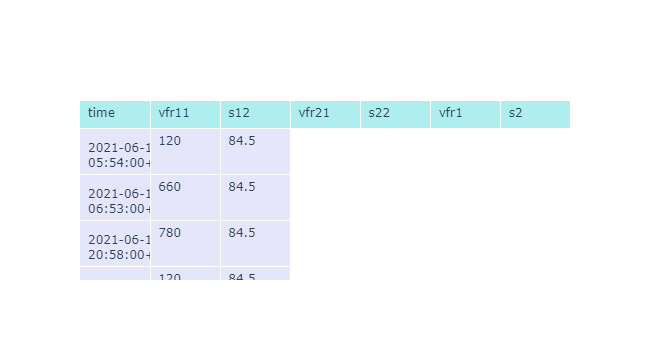

In [29]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.time, df.vfr11, df.s12],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [24]:
query = db.select([db.func.count(tr.columns.time)]).where(tr.columns.s12 == 84.5)
result_proxy = connection.execute(query)
result_set = result_proxy.fetchmany(10)

In [25]:
result_set

[(27,)]